In [106]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
#from yellowbrick.classifier import ClassificationReport

Vamos começar a explorar a nossa base. Temos duas bases: treino e teste onde a unica diferença é que na base de treino temos a nossa variável target: Survived

In [2]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

datasets = [train, test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Corremos as duas bases para verificar se há valores nulos em alguma coluna. Percebemos que as colunas Age, Cabin, Embarked e Fare ós contém. Tratamos então substituindo esses valores pela média em Age e Fare e pela Moda em Embarked. Cabin será descartada porteriormente, então não nos preocupemos com ela por enquanto.

In [5]:
print('valor nulo em train:\n', train.isnull().sum())
print("-"*10)

print('valor nulo em test:\n', test.isnull().sum())
print("-"*10)

valor nulo em train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
valor nulo em test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [6]:
drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column,axis=1, inplace = True)

for dataset in datasets:

    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

    dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

print('valor nulo em train:\n', train.isnull().sum())
print("-"*10)

print('valor nulo em test:\n', test.isnull().sum())
print("-"*10)

valor nulo em train:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
valor nulo em test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
----------


Temos duas clunas interessantes na nossa base:

SibSp = Siblings and Spouses
Parch = Parents and Childs

Basicamente ambas se referem a familia viajando junto com o passageiro, o que pode nos dar duas novas informações bem interessantes:

Familysize = Será que é mais facil ssobreviver ao naufragio com uma familia grande ou pequena? Vamos tentar descobrir isso somando as duas variaveis pra cada passageiro e adicionando mais 1, ainal o passageiro em si também faz parte da própria familia.

IsAlone = Será que é mais facil ssobreviver ao naufragio sozinho ou com acompanhado? Essa é uma variável booleana. Logo, basta verificar se o tamanho da familia é maior que 1, o que indica que ele não está sozinho.

É possível pegar também o título da pessoas a bordo, cada passageiro tem o seu nome informado da seguinte forma:
nome, título. sobrenome

Fazemos dois cortes então na string: uma antes da virgula com espaço e outra logo após o ponto. E assim temos o título do passageiro

In [7]:
for dataset in datasets:
    dataset['familySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['isAlone'] = 1
    dataset['isAlone'].loc[dataset['familySize'] > 1] = 0
    
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

C:\Users\rapha\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


Vamos começar nossas análises. Age e Fare são duas variáveis com muitos valores distintos. Vamos agrupar esses valores em bins e ver a correlação com a média de sobrevivência para cada bin de cada variável.

In [9]:
train['Age_bins'] = pd.cut(train['Age'], 5)
age_surv = train.groupby(['Age_bins'])['Survived'].mean().to_frame()
age_surv = age_surv.reset_index()
age_surv.head()

,Age_bins,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


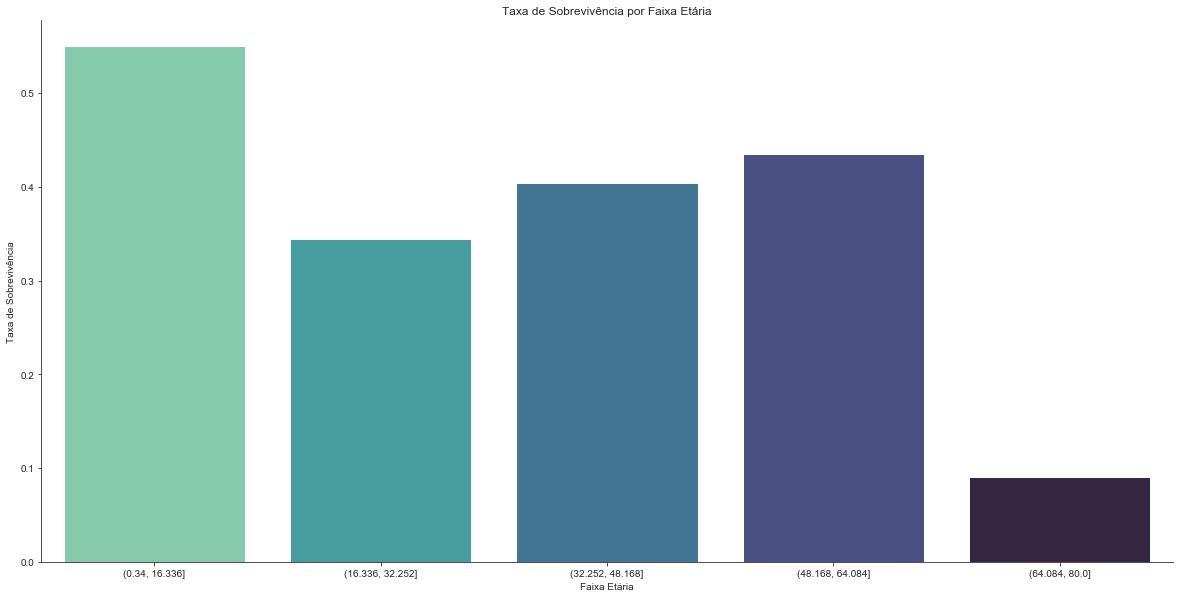

In [10]:
sns.set_style('ticks')
sns.catplot(x='Age_bins', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=age_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Faixa Etária')
#sns.despine()
plt.show()

Percebe-se que os mais novos e as pessoas de meia idade foram os grupos que mais sobreviveram. Quanto ao Fare, as pessoas que pagaram mais foram as que sobreviveram

In [11]:
train['Fare_bins'] = pd.cut(train['Fare'], 4)
fare_surv = train.groupby(['Fare_bins'])['Survived'].mean().to_frame()
fare_surv = fare_surv.reset_index()
fare_surv.head()

,Fare_bins,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


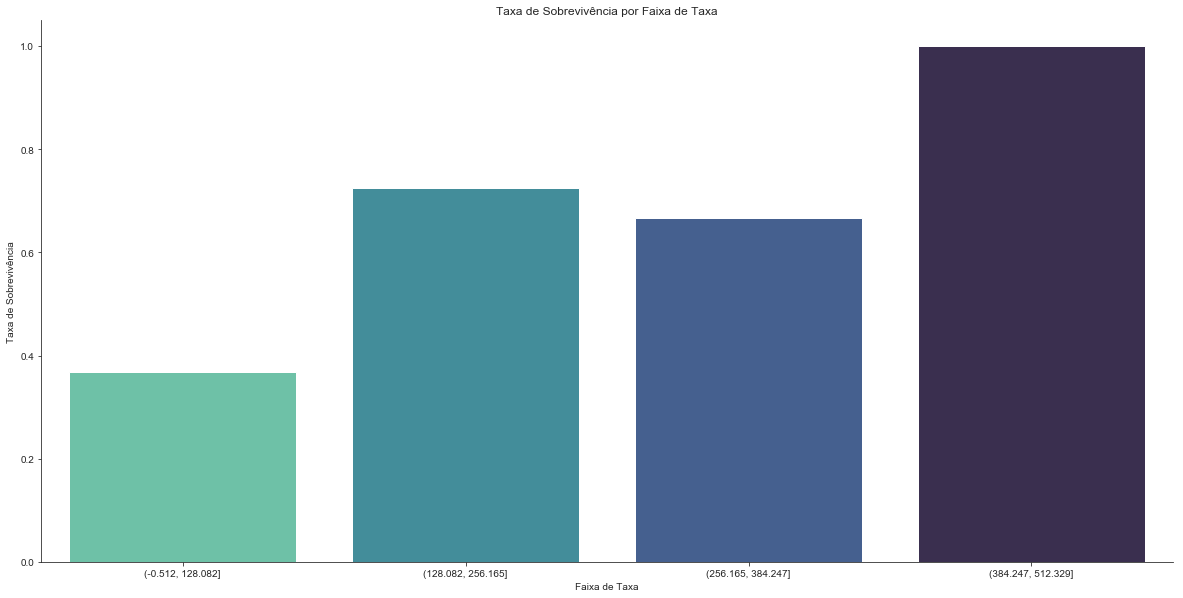

In [12]:
sns.set_style('ticks')
sns.catplot(x='Fare_bins', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=fare_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Faixa de Taxa')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Faixa de Taxa')
#sns.despine()
plt.show()

Se você já viu o filme, lembra da cena de prioridade para mulheres entrarem nos botes salva-vidas. De fato isso ocorreu, quase 3/4 das mulheres sobreviveram quanto que menos de 1/4 dos homens teve a sorte de sair vivo.

In [13]:
sex_surv = train.groupby(['Sex'])['Survived'].mean().to_frame()
sex_surv = sex_surv.reset_index()
sex_surv.head()

,Sex,Survived
0,female,0.742038
1,male,0.188908


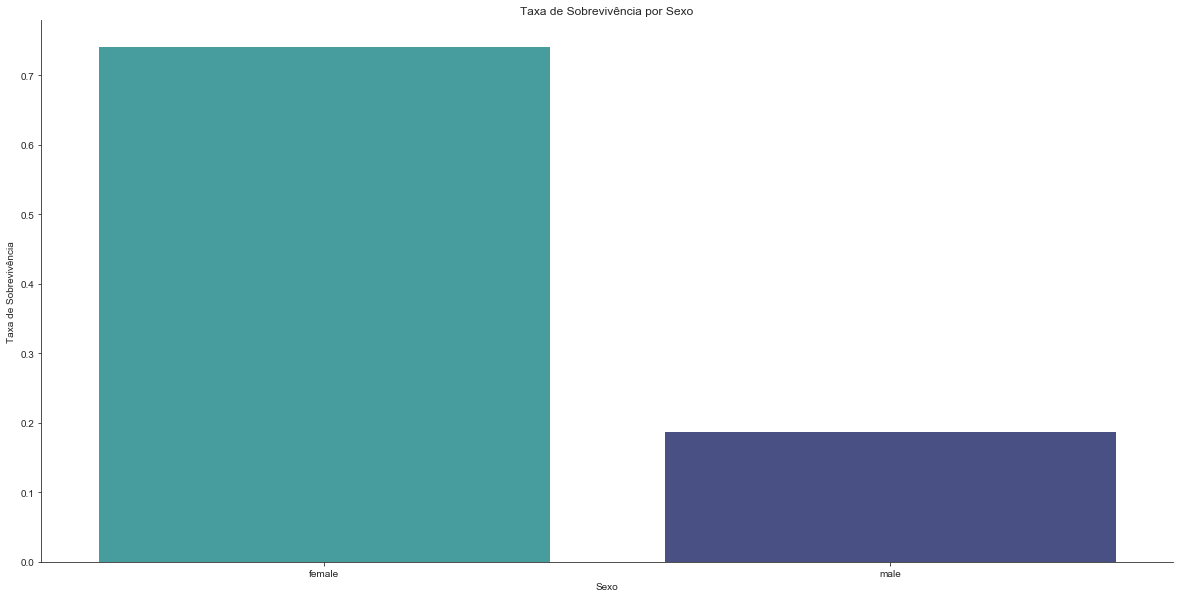

In [14]:
sns.set_style('ticks')
sns.catplot(x='Sex', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=sex_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Sexo')
#sns.despine()
plt.show()

A variável Embarked diz respeito ao portão de embarque de cada passageiro, muito provavelmente ligado a algum status social também. Perceb-se que quem embarcou pelo C, teve mais chance de sobreviver.

In [15]:
embarked_surv = train.groupby(['Embarked'])['Survived'].mean().to_frame()
embarked_surv = embarked_surv.reset_index()
embarked_surv.head()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


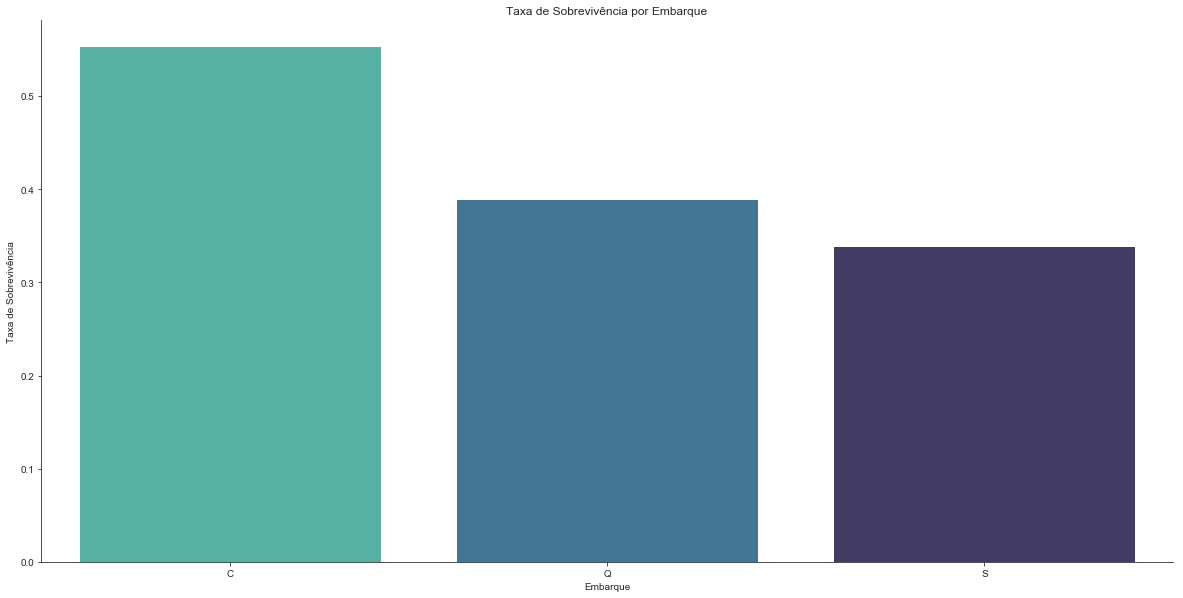

In [16]:
sns.set_style('ticks')
sns.catplot(x='Embarked', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=embarked_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Embarque')
#sns.despine()
plt.show()

Haviam a bordo familias de todos os tamanhos, é visto que as familiares menores tinham mais chances de sobreviver

In [17]:
family_surv = train.groupby(['familySize'])['Survived'].mean().to_frame()
family_surv = family_surv.reset_index()
family_surv.head(10)

,familySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


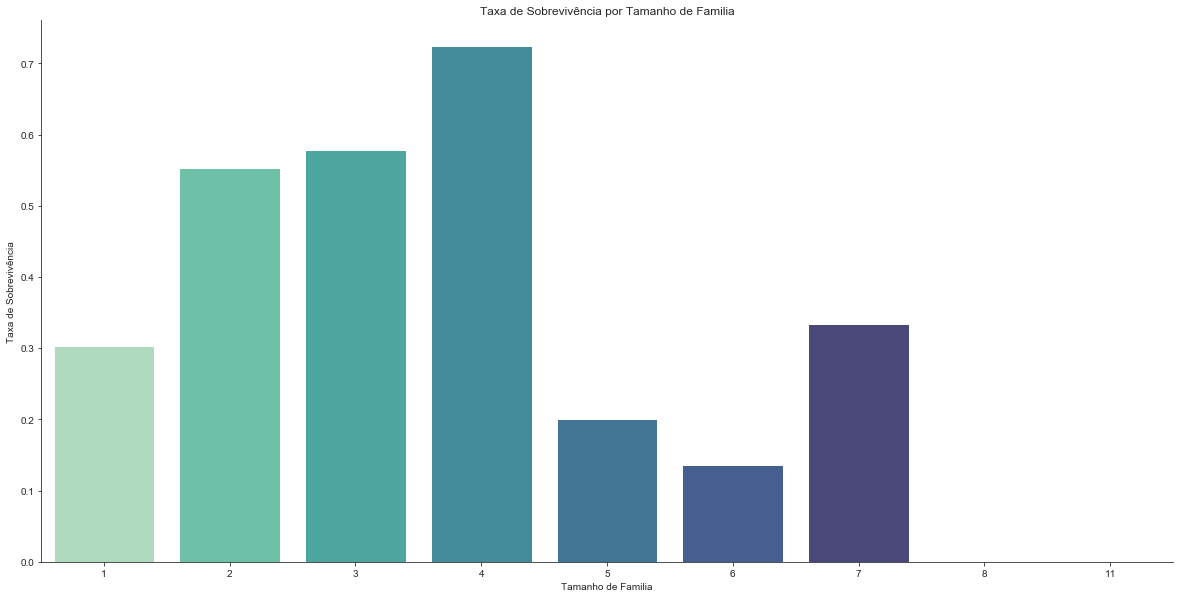

In [18]:
sns.set_style('ticks')
sns.catplot(x='familySize', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=family_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Tamanho de Familia')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Tamanho de Familia')
#sns.despine()
plt.show()

Quem estava companhado também teve mais chance de sobreviver. Só não podia estar acompanhado de 10 pessoas...

In [19]:
alone_surv = train.groupby(['isAlone'])['Survived'].mean().to_frame()
alone_surv = alone_surv.reset_index()
alone_surv.head(10)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


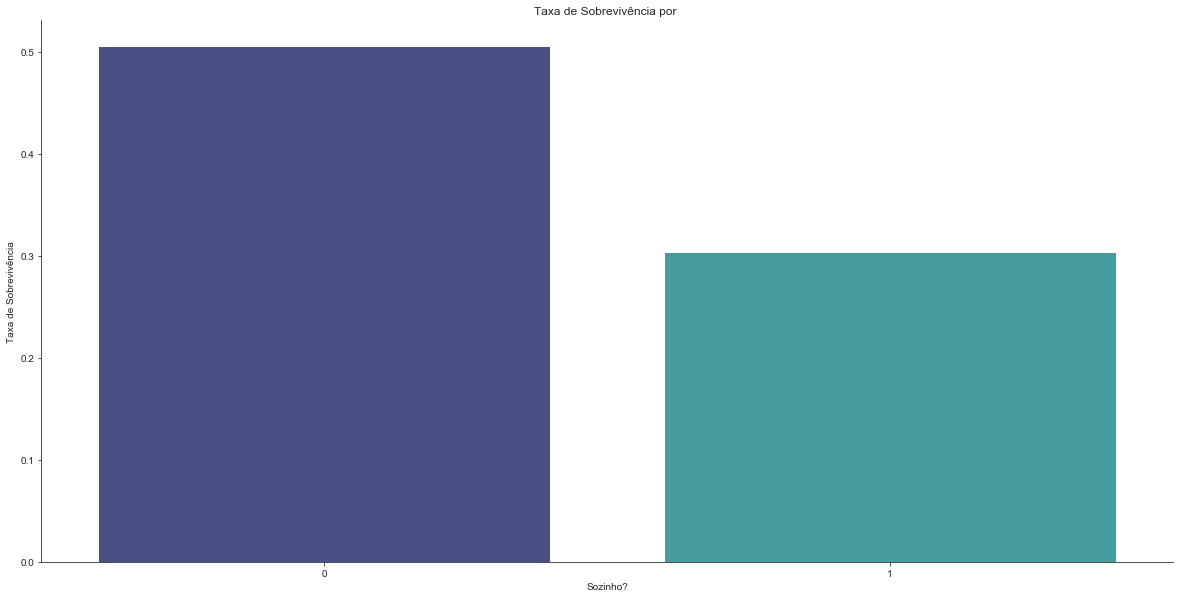

In [20]:
sns.set_style('ticks')
sns.catplot(x='isAlone', y='Survived', 
            #hue='state', 
            palette = "mako",
            ci = None,
            data=alone_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Sozinho?')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por ')
#sns.despine()
plt.show()

Para os títulos, os titulos femininos foram os que mais se salvaram bem como alguns titulos de destaque como Major and Master

In [21]:
title_surv = train.groupby(['Title'])['Survived'].mean().to_frame()
title_surv = title_surv.reset_index()
title_surv.head(20)

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


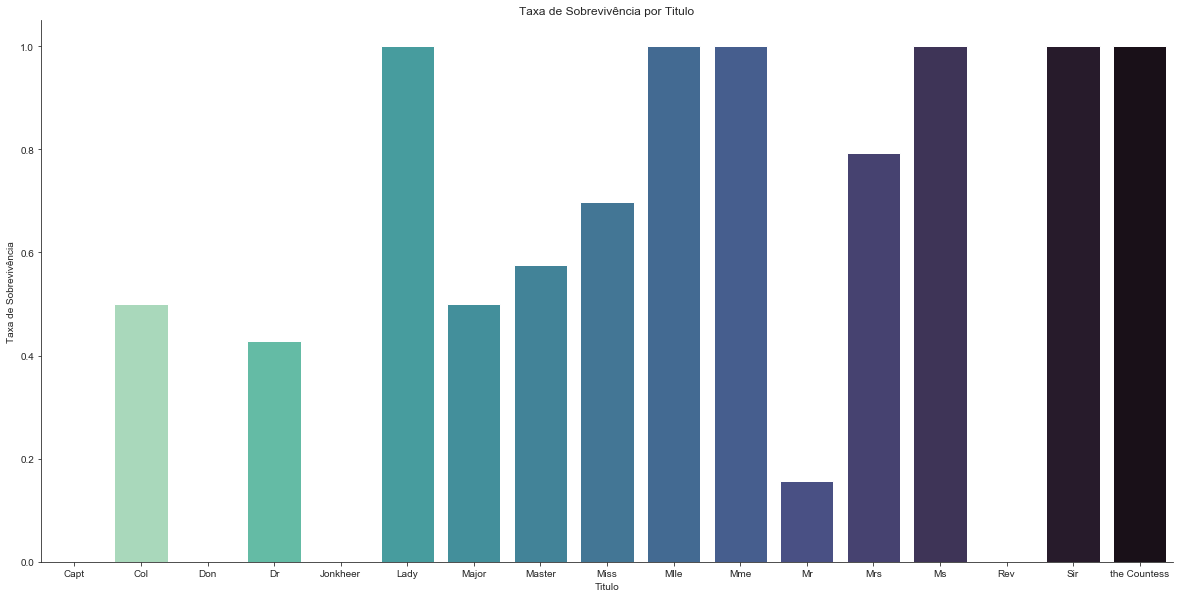

In [22]:
sns.set_style('ticks')
sns.catplot(x='Title', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=title_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Titulo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Titulo')
#sns.despine()
plt.show()

Não é de surpresa de ninguém que os mais ricos tiveram mais chances. Quem estava na primeira classe teve mais de 60% de chance de sobreviver contra 24% das pessoas da terceira classe

In [23]:
class_surv = train.groupby(['Pclass'])['Survived'].mean().to_frame()
class_surv = class_surv.reset_index()
class_surv.head(20)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


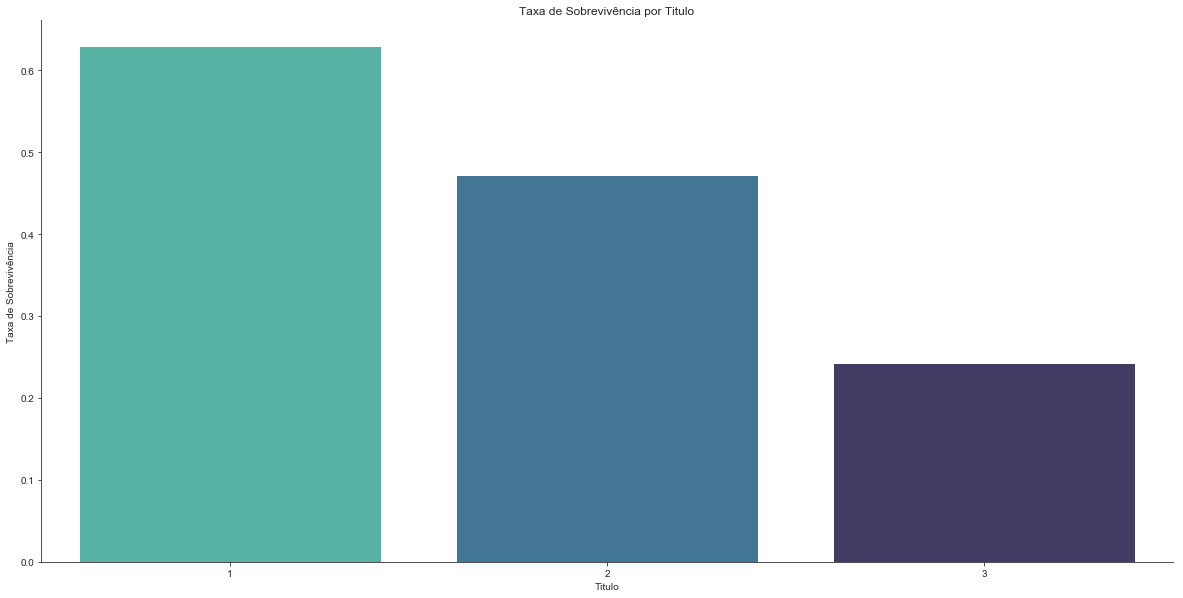

In [24]:
sns.set_style('ticks')
sns.catplot(x='Pclass', y='Survived', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            data=class_surv, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Titulo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Titulo')
#sns.despine()
plt.show()

Traçamos aqui a matriz de correlação onde podemos ver como as variavéis se correlacionam:

-1: Correlação negativa

 0: sem correlação
 
 1: Correlação positiva

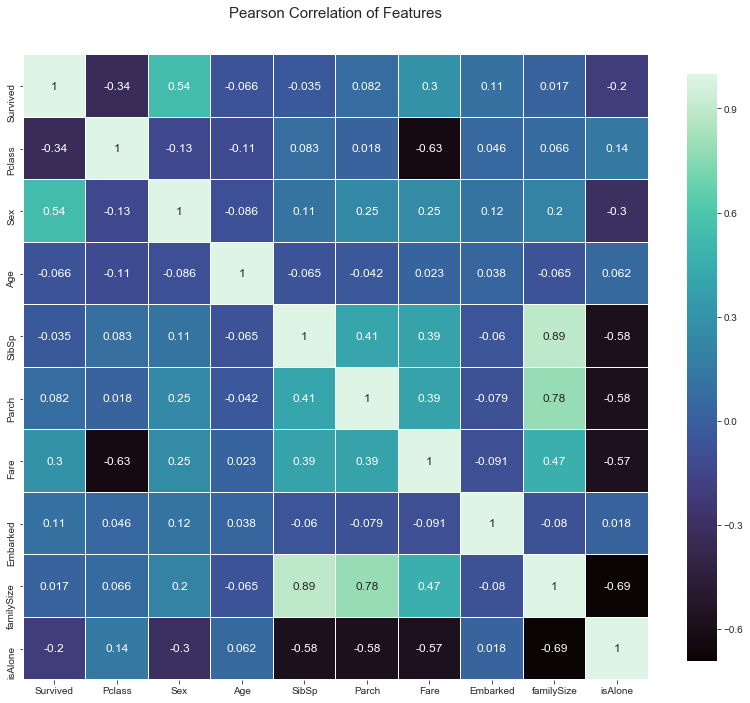

In [122]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'mako',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

Vamos nos preparar para rodar nossos modelos de ML. Para isso precisamos que todas as nossas variáveis sejas discretas. Logo, mapeamos tudo que é categórico ou contínuo para discreto.

In [26]:
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone,Title,Age_bins,Fare_bins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,2,0,Mr,"(16.336, 32.252]","(-0.512, 128.082]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,1,1,Miss,"(16.336, 32.252]","(-0.512, 128.082]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,1,1,Mr,"(32.252, 48.168]","(-0.512, 128.082]"


In [27]:
for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone,Title,Age_bins,Fare_bins
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,Mr,"(16.336, 32.252]","(-0.512, 128.082]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,Miss,"(16.336, 32.252]","(-0.512, 128.082]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,Mr,"(32.252, 48.168]","(-0.512, 128.082]"


In [28]:
for dataset in datasets:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [29]:
for dataset in datasets:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone,Title,Age_bins,Fare_bins
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,0,2,0,Mr,"(16.336, 32.252]","(-0.512, 128.082]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3,1,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1,0,1,1,Miss,"(16.336, 32.252]","(-0.512, 128.082]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,0,2,0,Mrs,"(32.252, 48.168]","(-0.512, 128.082]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1,0,1,1,Mr,"(32.252, 48.168]","(-0.512, 128.082]"


In [30]:
train = train.drop(['Fare_bins','Age_bins','Title','Name'], axis=1)

In [31]:
test = test.drop(['Name','Ticket','Cabin','Title'], axis=1)

Ao final temos ambas as bases com 9 colunas cada com apenas uma coluna de diferença:

Na de teste temos a coluna Survived que é nossa variável target e na de teste o id do passageiro cujo qual vai ser relacionado ao Survived posteriormente

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone
0,0,3,0,1.0,1,0,0,0,2,0
1,1,1,1,2.0,1,0,3,1,2,0
2,1,3,1,1.0,0,0,1,0,1,1
3,1,1,1,2.0,1,0,3,0,2,0
4,0,3,0,2.0,0,0,1,0,1,1


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,isAlone
0,892,3,0,2.0,0,0,0,2,1,1
1,893,3,1,2.0,1,0,0,0,2,0
2,894,2,0,3.0,0,0,1,2,1,1
3,895,3,0,1.0,0,0,1,0,1,1
4,896,3,1,1.0,1,1,1,0,3,0


Sendo assim: 

Nosso X_train vai ser todas as varivaéis da base de treino exceto a target

Nosso Y_train vai ser a variável target

Nosso X_test vai todas as varivéis da base de test exceto o passengerId

In [56]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

Vamos testar vários modelos e pra cada um faremos uma matriz confusão normalizada e uma não normalizada. Por isso, criamos uma função onde passamos apenas o modelo que estamos utilizando para plotar as matrizes.

In [94]:
def plot_metrics(model):
    
    pred = model_selection.cross_val_predict(model,X_train, Y_train)
    array = metrics.confusion_matrix(Y_train,pred)
    norm_array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]
    print(metrics.classification_report(Y_train,pred))

    df_cm = pd.DataFrame(array, range(2),range(2))
    sns.heatmap(df_cm, annot=True, cmap='mako',fmt='g')
    plt.title('Matriz Confusão Não Normalizada')
    plt.show()
    print('')
    df_cm = pd.DataFrame(norm_array, range(2),range(2))
    df_cm = 100*df_cm
    df_cm = df_cm.round(2)
    sns.heatmap(df_cm, annot=True, cmap='mako',fmt='g')
    plt.title('Matriz Confusão Normalizada')
    plt.show()

In [53]:
# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       549
          1       0.75      0.68      0.72       342

avg / total       0.79      0.79      0.79       891



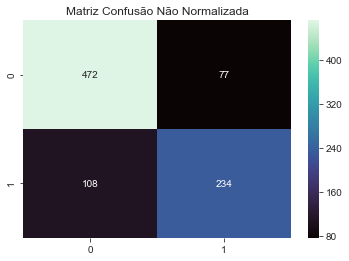

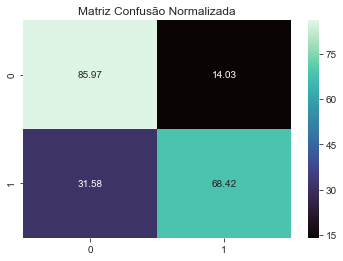

In [95]:
plot_metrics(logreg)

In [97]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       549
          1       0.79      0.70      0.74       342

avg / total       0.81      0.81      0.81       891



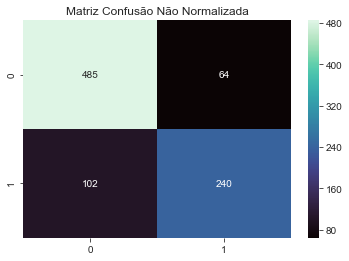

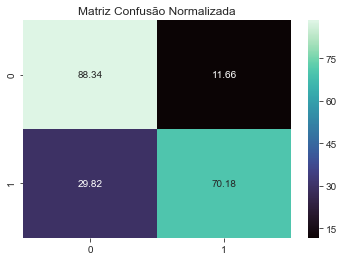

In [98]:
plot_metrics(svc)

In [99]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.86

             precision    recall  f1-score   support

          0       0.83      0.85      0.84       549
          1       0.74      0.72      0.73       342

avg / total       0.79      0.80      0.80       891



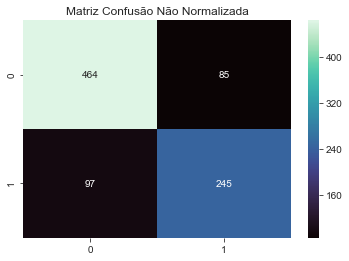

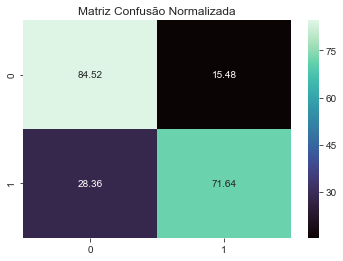

In [100]:
plot_metrics(knn)

In [101]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.76

             precision    recall  f1-score   support

          0       0.86      0.65      0.74       549
          1       0.60      0.84      0.70       342

avg / total       0.76      0.72      0.73       891



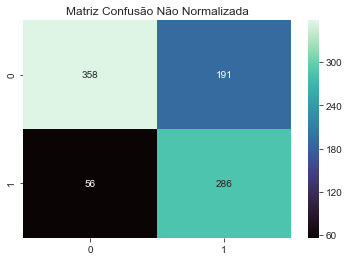

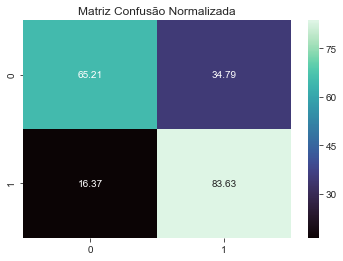

In [102]:
plot_metrics(gaussian)

In [107]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

74.75

             precision    recall  f1-score   support

          0       0.84      0.51      0.64       549
          1       0.52      0.85      0.64       342

avg / total       0.72      0.64      0.64       891



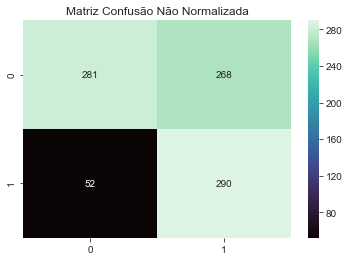

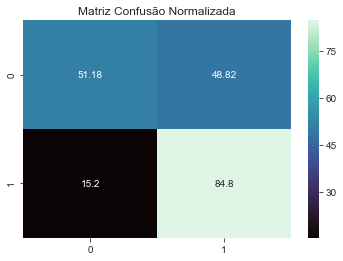

In [108]:
plot_metrics(perceptron)

In [109]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.13

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       549
          1       0.75      0.68      0.72       342

avg / total       0.79      0.79      0.79       891



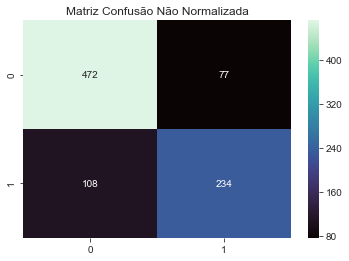

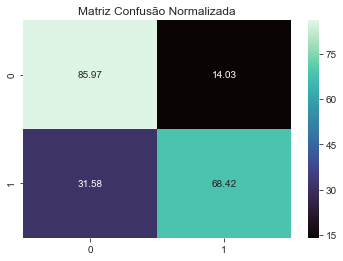

In [110]:
plot_metrics(linear_svc)

In [111]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.68

             precision    recall  f1-score   support

          0       0.70      0.96      0.81       549
          1       0.85      0.34      0.49       342

avg / total       0.76      0.72      0.69       891



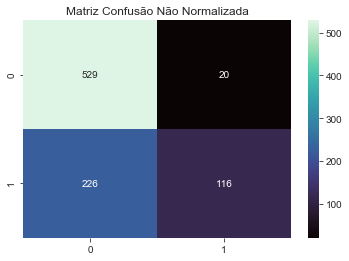

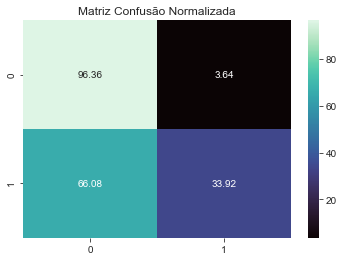

In [112]:
plot_metrics(sgd)

In [113]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.66

             precision    recall  f1-score   support

          0       0.81      0.86      0.83       549
          1       0.75      0.68      0.71       342

avg / total       0.79      0.79      0.79       891



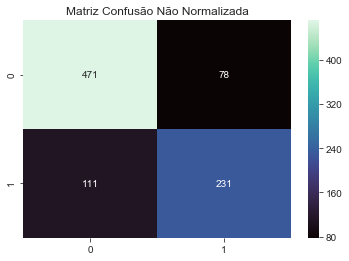

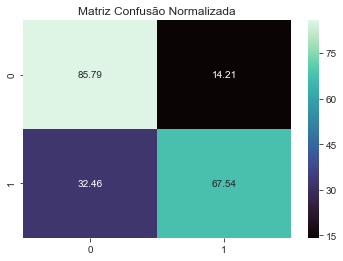

In [114]:
plot_metrics(decision_tree)

In [115]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.66

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       549
          1       0.75      0.69      0.72       342

avg / total       0.79      0.79      0.79       891



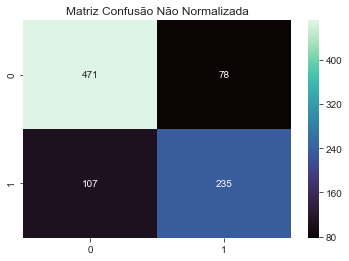

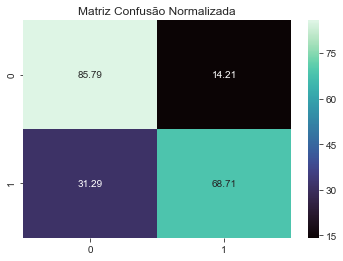

In [116]:
plot_metrics(decision_tree)

De todos os modelos, random_forte e decison_tree foram os mais assertivos e perceptron e naive_bayes os menos assertivos

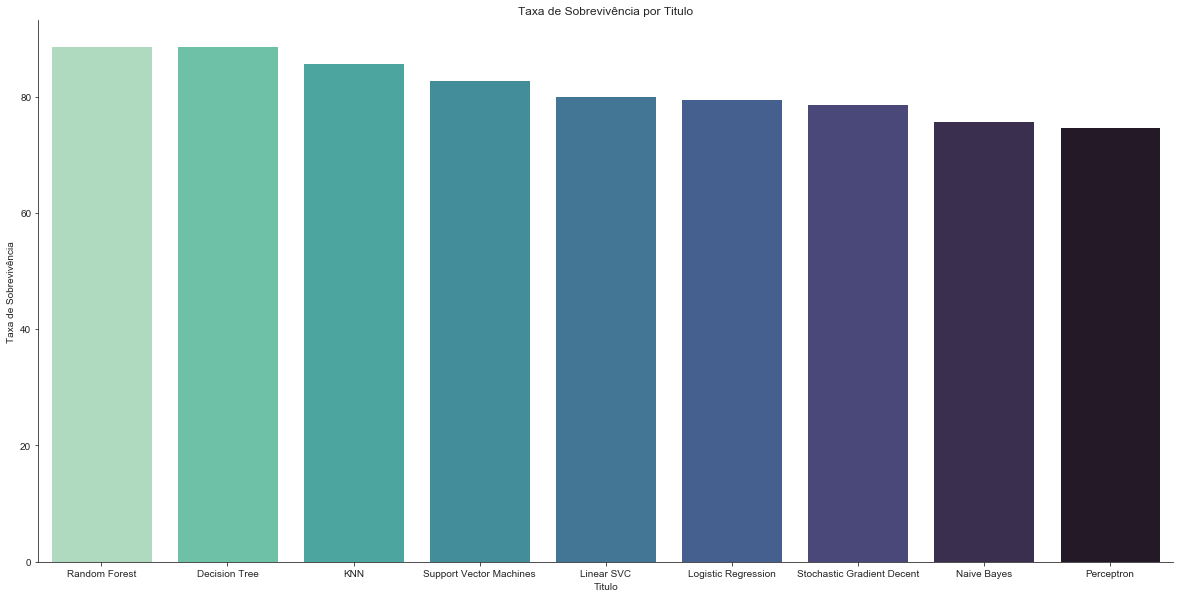

In [121]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)
# models.head(10)

sns.set_style('ticks')
sns.catplot(x='Model', y='Score', 
            #hue='state', 
            palette = "mako_r",
            ci = None,
            order=['Random Forest','Decision Tree','KNN','Support Vector Machines',
                   'Linear SVC','Logistic Regression','Stochastic Gradient Decent', 
                   'Naive Bayes','Perceptron'],
            data=models, 
            height=8.27, 
            aspect=20/10,
            kind='bar')
plt.xlabel('Titulo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Titulo')
#sns.despine()
plt.show()

Por fim, pegamos o nosso Passenger_id e juntamos com o que foi previsto.

In [90]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [92]:
submission.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
